### Overview ###

Imagine you are a data scientist tasked with predicting sales based on advertising spend for a marketing campaign. While your regression model may produce a fitted line and summary statistics, how do you know if it represents the data accurately? Are there outliers or influential points skewing your results? Does the model meet key assumptions?

To address these questions, you will follow a systematic approach to assess the fit of the regression model.
- Visualize data to uncover initial relationships and patterns.
- Fit a regression model and overlay the regression line with the correlation coefficient.
- Diagnose potential issues through r<sup>2</sup>, residual analysis, and influential point detection

**Key Process Steps**
- Compute r<sup>2</sup>: evaluate how much variability in the dependent variable is explained by the independent variable.
    - Challenge: misinterpreting r<sup>2</sup> as a measure of prediction accuracy rather than variability explained.
- Analyze Residuals: examine residual plots to ensure randomness and detect patterns.
    - Challenge: identifying subtle patterns like non-linearity or heteroscedasticity that violate regression assumptions.
- Identify Influential Observations: use diagnostics like Cook’s Distance to pinpoint data points that might disproportionately affect the model.
    - Challenge: balancing quantitative diagnostics with qualitative judgment to decide whether to retain or remove points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load and inspect the dataset:

In [2]:
# Generate dataset: Advertising spend vs. sales
np.random.seed(42)  # For reproducibility

# Generate normal data
advertising = np.random.rand(48) * 100  # Independent variable
sales = 3 * advertising + np.random.normal(size=48, scale=10)  # Dependent variable

# Introduce an outlier (large residual, near center of x-values)
advertising = np.append(advertising, [50])  # Near the center of x
sales = np.append(sales, [500])  # Very high y value (outlier)

# Introduce an influential point (high leverage, near regression line)
advertising = np.append(advertising, [200])  # Extreme x value
sales = np.append(sales, [400])  # Close to the regression line

 

# Create the DataFrame
data = pd.DataFrame({'Advertising': advertising, 'Sales': sales})

# Display the first few rows
print(data.head())

# Check data informat
print(data.info())

   Advertising       Sales
0    37.454012   99.080175
1    95.071431  287.182904
2    73.199394  226.982848
3    59.865848  181.311228
4    15.601864   45.649109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Advertising  50 non-null     float64
 1   Sales        50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes
None


Define variables:

In [3]:
# Define independent and dependent variables
X = sm.add_constant(data['Advertising'])  # Add constant for intercept
y = data['Sales']

# Check dimensions
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (50, 2)
y shape: (50,)


Create scatterplot:

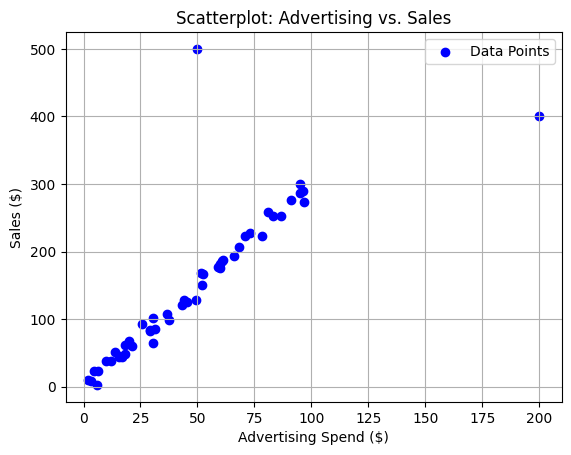

In [4]:
# Create scatterplot
plt.scatter(data['Advertising'], data['Sales'], color='blue', label='Data Points')
plt.title('Scatterplot: Advertising vs. Sales')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

Fit regression model and add regression line:

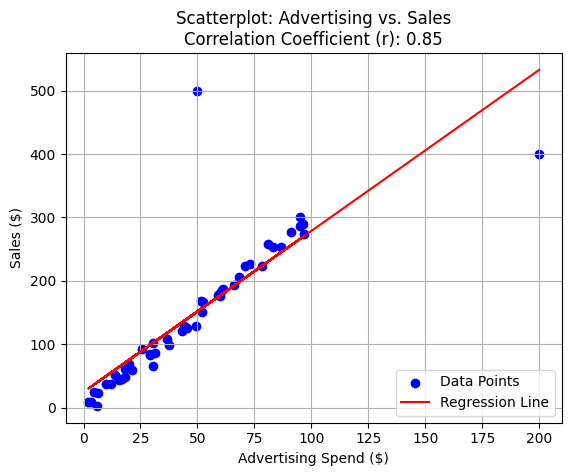

Regression Line: y = 24.58 + 2.54x


In [5]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Compute regression line
y_pred = model.predict(X)

# Calculate correlation coefficient (r)
r = np.corrcoef(data['Advertising'], data['Sales'])[0, 1]

# Scatterplot with regression line and r value
plt.scatter(data['Advertising'], data['Sales'], color='blue', label='Data Points')
plt.plot(data['Advertising'], y_pred, color='red', label='Regression Line')
plt.title(f'Scatterplot: Advertising vs. Sales\nCorrelation Coefficient (r): {r:.2f}')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print the regression line equation
b0 = model.params['const']
b1 = model.params['Advertising']
print(f"Regression Line: y = {b0:.2f} + {b1:.2f}x")

Compute r<sup>2</sup>

In [6]:
# Compute R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.73


Analyze residuals:

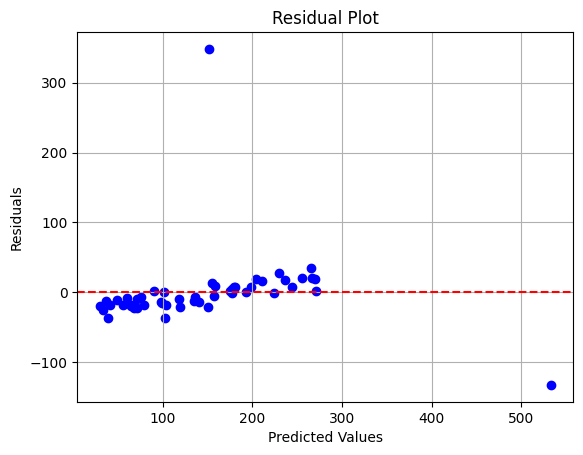

In [7]:
# Extract residuals
residuals = model.resid

# Create a residual plot
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

Identify influential observations:

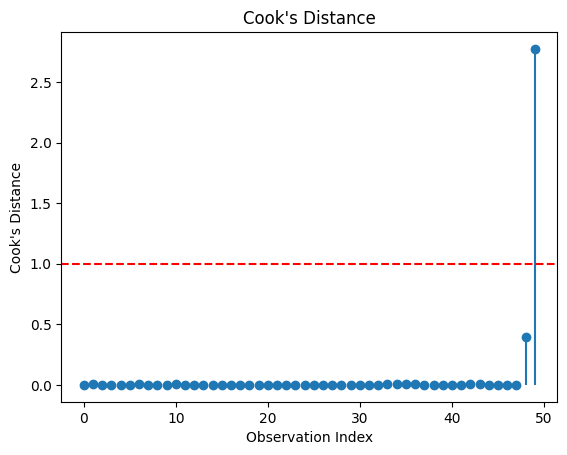

High influence points: [49]


In [8]:
# Compute Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(1, color='red', linestyle='--')  # Threshold line
plt.show()

# Print observations with high Cook's Distance
high_influence_points = np.where(cooks_d > 1)[0]
print(f"High influence points: {high_influence_points}")

Diagnose outliers:

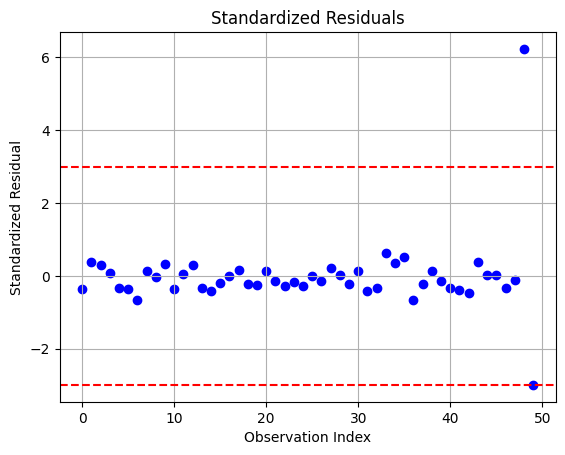

Potential outliers: [48]


In [9]:
# Extract standardized residuals
standardized_residuals = influence.resid_studentized_internal

# Plot standardized residuals
plt.scatter(np.arange(len(standardized_residuals)), standardized_residuals, color='blue')
plt.axhline(3, color='red', linestyle='--')  # Upper threshold
plt.axhline(-3, color='red', linestyle='--')  # Lower threshold
plt.title('Standardized Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Standardized Residual')
plt.grid(True)
plt.show()

# Print potential outliers
outliers = np.where((standardized_residuals > 3) | (standardized_residuals < -3))[0]
print(f"Potential outliers: {outliers}")